In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb **OK**

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe **OK**

In [3]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma: **OK**

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb) <- newnames
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados. **OK**

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados <- round(airbnb$PiesCuadrados * 0.092903)
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,50
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal **OK**

In [6]:
# Usamos otro dataframe para hacer las modificaciones y las pruebas
clean_airbnb <- airbnb
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal==""]<-NA
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="-"]<-NA
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="28"]<-NA
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="Madrid 28004"|clean_airbnb$CodigoPostal=="27004"]<-"28004"
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="2804"]<-"28004"
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="20013"|clean_airbnb$CodigoPostal=="280013"]<-"28013"
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="20126"]<-"28012"
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="28051\n28051"]<-"28051"
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="2015"|clean_airbnb$CodigoPostal=="28105"]<-"28015"
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="2815"|clean_airbnb$CodigoPostal=="2805"]<-"28015"
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="25008"]<-"28008"
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="27013"]<-"28013"
clean_airbnb$CodigoPostal[clean_airbnb$CodigoPostal=="28002\n28002"]<-"28002"

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? **OK**

In [7]:
# Volvemos a volcar los datos limpios en airbnb y borramos los levels que ya no se usen con droplevels
airbnb <- droplevels(clean_airbnb)
# Mostramos los levels del codigo postal
levels(airbnb$CodigoPostal)

[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?**OK**

In [8]:
# Con la función table se hace un recuento de las apariciones de cada código postal
table(airbnb$CodigoPostal)
# Si los ordenamos con sort podemos mostrar los 5 primeros en un orden creciente
print("Menos apariciones:")
head(sort(table(airbnb$CodigoPostal)),n=5)
# Si los ordenamos con sort podemos mostrar los 5 primeros en un orden decreciente
print("Mas apariciones:")
head(sort(table(airbnb$CodigoPostal), decreasing = TRUE),n=5)


28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1797  1194   218   206   339   216   384   250  2061  1022 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   604    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28850 
   85    12    12     1     1     1     1     1 

[1] "Menos apariciones:"



28048 28052 28056 28058 28060 
    1     1     1     1     1 

[1] "Mas apariciones:"



28012 28004 28005 28013 28014 
 2061  1797  1194  1022   630 

¿Cuales son los barrios que hay en el código postal 28012? **OK**

In [9]:
# Volcamos las apariciones de barrios para el cp 28012
barrios_28012 <- airbnb$Barrio[airbnb$CodigoPostal=="28012"]
# Eliminamos los NA
barrios_28012 <- na.omit(barrios_28012)
# borramos los level que no se usan
barrios_28012 <- droplevels(barrios_28012)
# Mostramos los barrios del cp 28012
levels(barrios_28012)

[1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Moscardó"       
 [9] "Palacio"         "Palos de Moguer" "Sol"             "Universidad"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal? **OK**

In [10]:
table(barrios_28012)

barrios_28012
        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya        Moscardó         Palacio Palos de Moguer 
           1449               1               1              27              46 
            Sol     Universidad 
            301               4 

**Es posible que un código postal que se refieren a los antiguos distritos postales pueda tener diferentes barrios, igual que un barrio podría tener diferentes códigos postales. En este caso no es 100% fiable porque hay algunos barrios que claramente no coinciden con ese cp, como por ejemplo Goya. Pero los barrios con mas apariciones están bien, es decir, Cortes, Embajadores, Sol. Podríamos darlo por bueno.**


PD: la oficina donde trabajo está en el 28012 y sé cual es la zona ;)

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son? **OK**

In [11]:
print("Número de barrios:")
length(levels(airbnb$Barrio))

[1] "Número de barrios:"


[1] 125

¿Cuales son los 5 barrios que tienen mayor número entradas? **OK**

In [12]:
# Acumulamos con la función table como hicimos para acumular por cp anteriormente ordenados decrecientemente
head(sort(table(airbnb$Barrio),decreasing = TRUE),n=5)


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo? **OK**

In [13]:
print("Número de tipos de alquiler:")
length(levels(airbnb$TipoAlquiler))
print("Tipos de alquiler:")
levels(airbnb$TipoAlquiler)
print("Acumulados por tipo de alquiler:")
table(airbnb$TipoAlquiler)

[1] "Número de tipos de alquiler:"


[1] 3

[1] "Tipos de alquiler:"


[1] "Entire home/apt" "Private room"    "Shared room"

[1] "Acumulados por tipo de alquiler:"



Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler **OK**

In [14]:
library(ggplot2)
options(repr.plot.height=8,repr.plot.width=12)

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


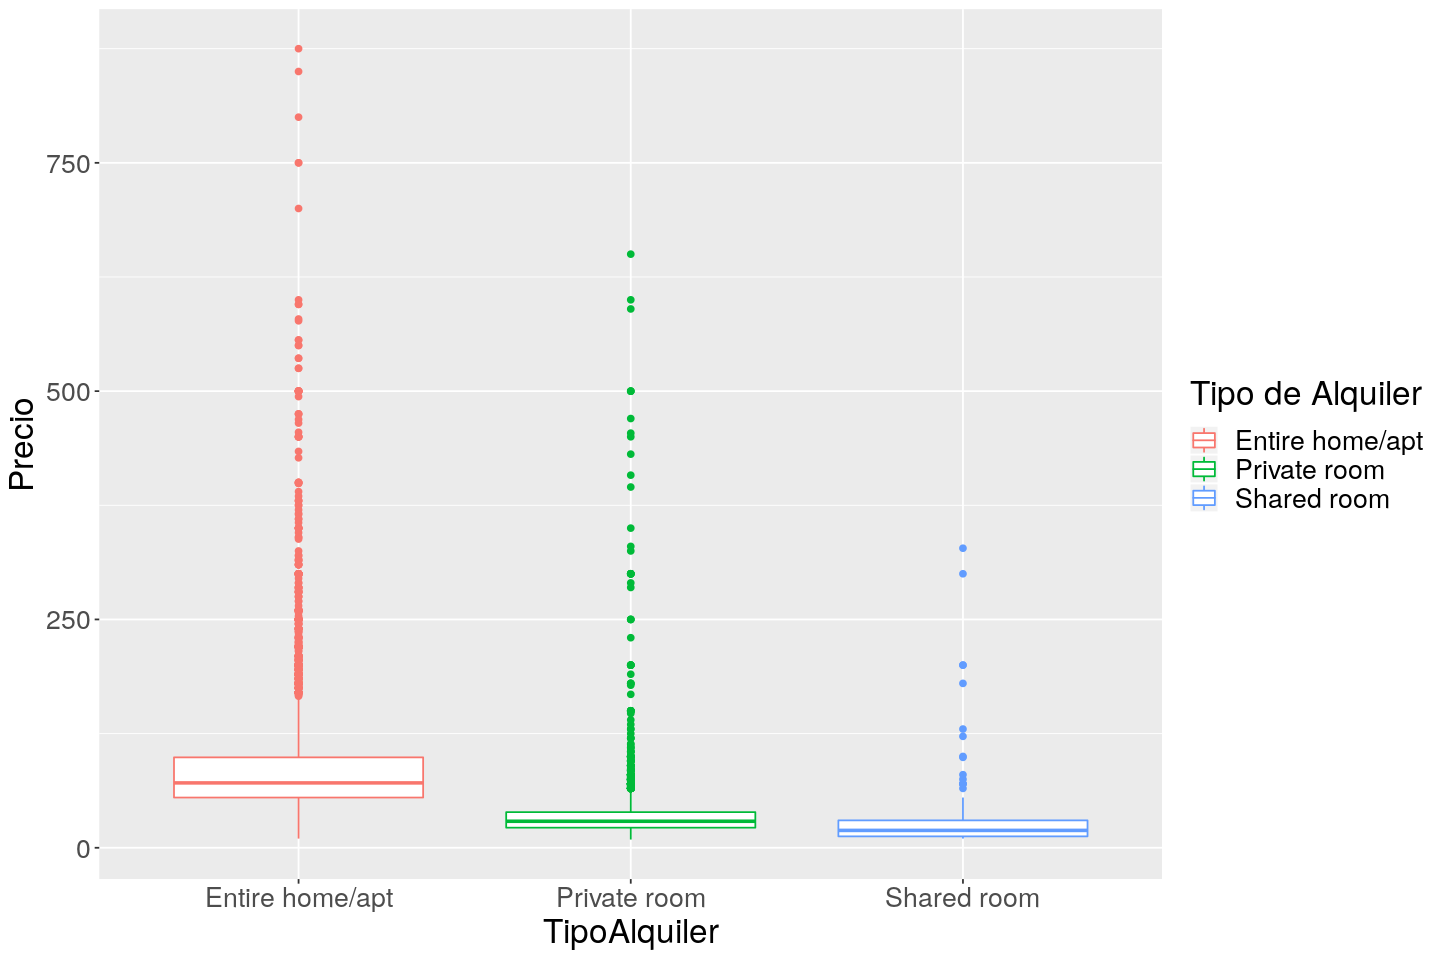

In [15]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()+
scale_color_discrete(name="Tipo de Alquiler") + 
theme(tex=element_text(size=20))

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías? **OK**

In [16]:
mean_entire <- round(mean(airbnb[airbnb$TipoAlquiler=="Entire home/apt", "Precio"], na.rm = TRUE),2)
mean_private_room <- round(mean(airbnb[airbnb$TipoAlquiler=="Private room", "Precio"], na.rm = TRUE),2)
mean_shared_room <- round(mean(airbnb[airbnb$TipoAlquiler=="Shared room", "Precio"], na.rm = TRUE),2)
print(paste("La media de precio de los inmuebles completos es: ", mean_entire, "€"))
print(paste("La media de precio de las habitaciones privadas es: ", mean_private_room, "€"))
print(paste("La media de precio de las habitaciones compartidas es: ", mean_shared_room, "€"))

[1] "La media de precio de los inmuebles completos es:  87.3 €"
[1] "La media de precio de las habitaciones privadas es:  34.26 €"
[1] "La media de precio de las habitaciones compartidas es:  29.85 €"


**Con las medias se puede ver que cuanto mayor sea el espacio privado mayor será el precio.**

In [17]:
# Comprobamos mediante el test de Shapiro si la distribución es Gaussiana
airbnb_reduc <- airbnb[sample (1:nrow(airbnb),5000),]
shapiro.test(airbnb_reduc$Precio)


	Shapiro-Wilk normality test

data:  airbnb_reduc$Precio
W = 0.69453, p-value < 2.2e-16


In [18]:
# Como el test de Shapiro nos da un p-valor muy bajo debemos pensar que no es una distribucion Gaussiana
# Por ello usamos el test de Kruskal
kruskal.test( Precio ~ TipoAlquiler, data=airbnb)


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


**Con el test de Kruskal comprobamos que el tipo de alquiler tiene mucha importancia en la media del precio (p-value)**

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo. **OK**

In [19]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=="Entire home/apt",]
print("Numero de registros Entire home/apt")
nrow(airbnb_entire)
head(airbnb_entire)

[1] "Numero de registros Entire home/apt"


[1] 7903

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,50
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire **OK**

In [20]:
head(sort(table(airbnb_entire$Barrio), decreasing = TRUE), n=5)


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)` **OK**

In [21]:
df <- aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE)
# Ordenamos el dataframe orden descendente por el precio
df <- df[with(df, order(-df$Precio)), ]
head(df, n=5)

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior. **OK**

In [22]:
# Obtenemos un dataframe con las frecuencias de los barrios
df_barrio_freq <- data.frame(table(airbnb_entire$Barrio))
# Cambio el nombre de las columnas para que podamos hacer el merge
names(df_barrio_freq) <- c("Barrio", "Freq")
df_barrio_freq_precio <- merge(df, df_barrio_freq)
#Ordenamos el dataframe obtenido por preecios
df_barrio_freq_precio <- df_barrio_freq_precio[with(df_barrio_freq_precio, order(-df_barrio_freq_precio$Precio)), ]
head(df_barrio_freq_precio, n=5)

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
77,Palomas,309.7500,4
50,Fuentelareina,180.0000,2
93,Recoletos,161.9254,135
43,El Plantío,150.0000,1
30,Castellana,141.3889,73


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler. **OK**

In [23]:
top5 <- head(df_barrio_freq_precio[df_barrio_freq_precio$Freq>100,], n=5)
top5

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios **OK**

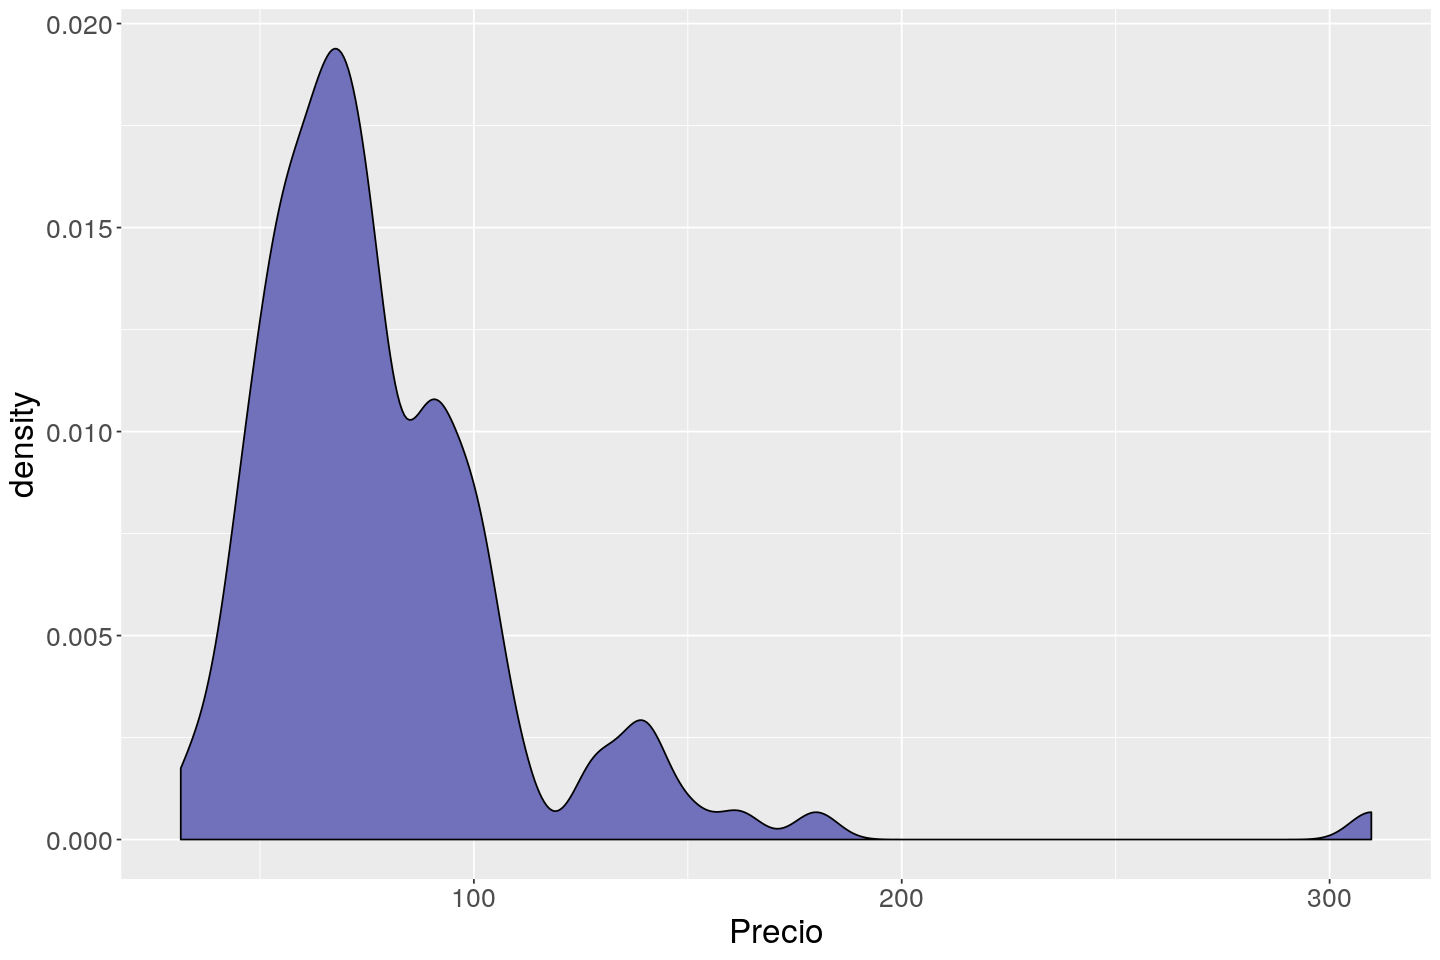

In [24]:
ggplot(data=df_barrio_freq_precio, aes(Precio))+
geom_density(fill="#7070BB",color="#010101", bw=5)+
theme(tex=element_text(size=20))

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas **OK**

In [25]:
metros_cuadrados = c()
for(barrio in top5$Barrio){
    metros_barrio <- mean(airbnb[airbnb$Barrio==barrio,"MetrosCuadrados"],na.rm = TRUE)
    metros_cuadrados <- c(metros_cuadrados, metros_barrio)
}
top5$MetrosCuadrados <- metros_cuadrados
top5

,Barrio,Precio,Freq,MetrosCuadrados
,<fct>,<dbl>,<int>,<dbl>
93,Recoletos,161.92537,135,26.66667
52,Goya,111.33803,142,50.40000
106,Sol,100.75036,701,41.40299
108,Trafalgar,98.57848,223,48.50000
59,Justicia,98.25468,534,28.12500


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos **OK**

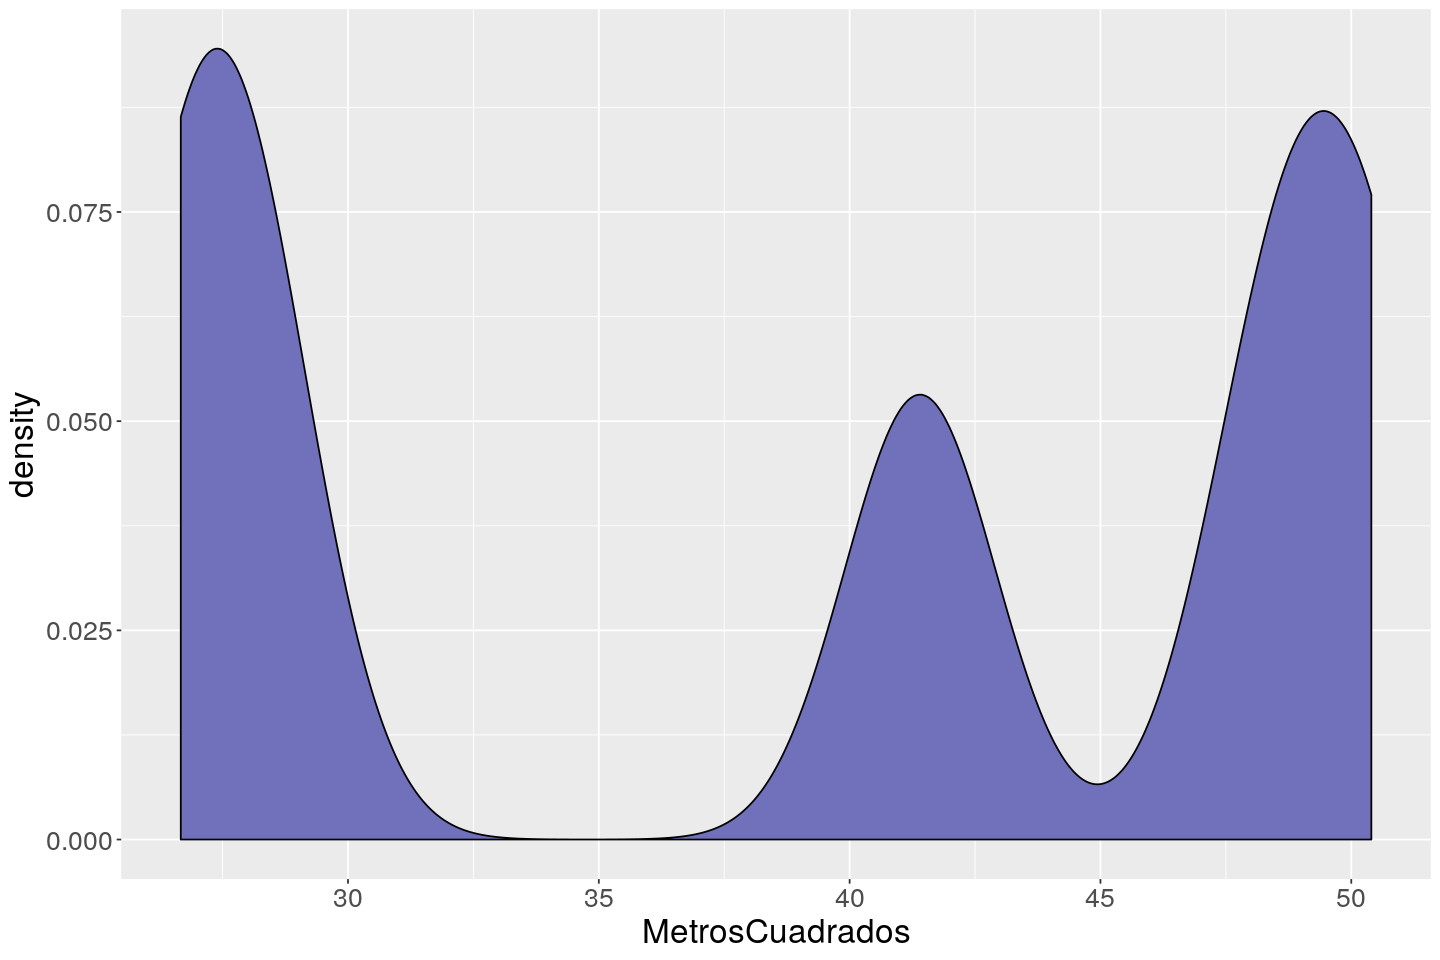

In [26]:
ggplot(data=top5, aes(MetrosCuadrados))+
geom_density(fill="#7070BB",color="#010101", bw=1.5)+
theme(tex=element_text(size=20))

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo? **OK**

In [27]:
kruskal.test( MetrosCuadrados ~ Barrio, data=top5)


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 4, df = 4, p-value = 0.406


**Por el valor tan alto del p-valor parece que no son estadísticamente diferentes**

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables: **OK**
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [28]:
# Obtenemos los inmuebles de sol
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
# Hacemos un modelo lineal entre metros cuadrados y número de dormitorios
model<-lm(data=barrio_sol,formula=MetrosCuadrados~NumDormitorios)
model
summary(model)


Call:
lm(formula = MetrosCuadrados ~ NumDormitorios, data = barrio_sol)

Coefficients:
   (Intercept)  NumDormitorios  
         6.792          25.320  



Call:
lm(formula = MetrosCuadrados ~ NumDormitorios, data = barrio_sol)

Residuals:
     Min       1Q   Median       3Q      Max 
-108.074  -32.112    7.407   27.888  117.247 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.792      9.258   0.734    0.466    
NumDormitorios   25.320      4.813   5.261 2.17e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.3 on 58 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.323,	Adjusted R-squared:  0.3114 
F-statistic: 27.68 on 1 and 58 DF,  p-value: 2.168e-06


Primero calculamos la correlación para ver como se relacionan estas variables entre sí. **OK**

In [29]:
matriz_correlacion = cor(cbind(barrio_sol$NumBanyos, barrio_sol$NumDormitorios, 
                                barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados),use = "complete")
rownames(matriz_correlacion) = colnames(matriz_correlacion) = c("NumBanyos", "NumDorm", "MaxOcup", "m2")
matriz_correlacion

,NumBanyos,NumDorm,MaxOcup,m2
NumBanyos,1.0000000,0.6873719,0.7017290,0.4818932
NumDorm,0.6873719,1.0000000,0.7853809,0.5683640
MaxOcup,0.7017290,0.7853809,1.0000000,0.4284304
m2,0.4818932,0.5683640,0.4284304,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.
 **OK**

Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


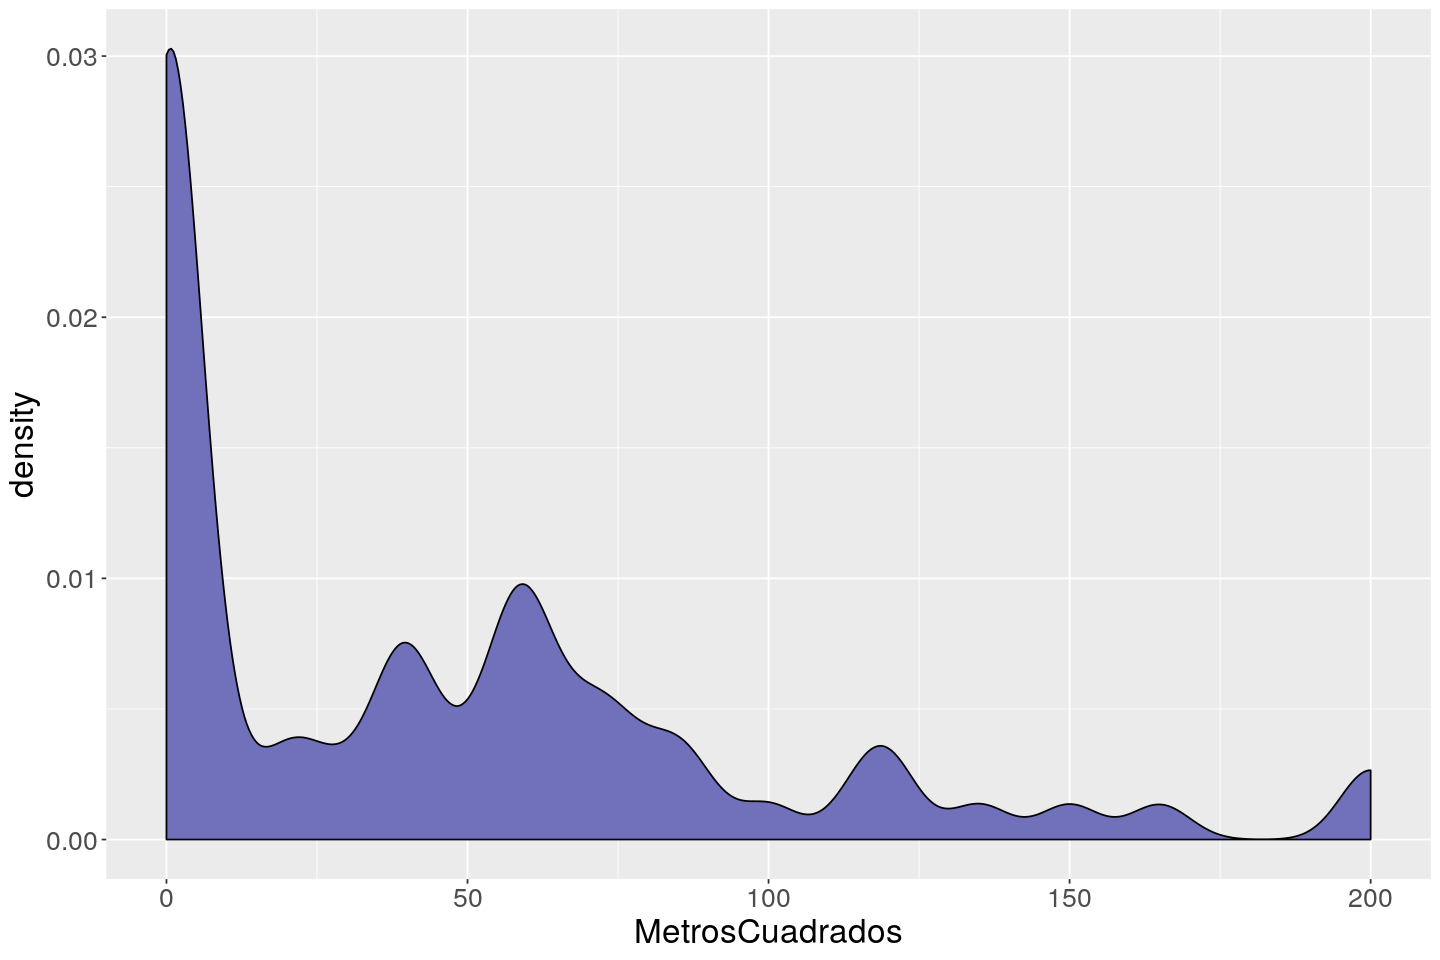

In [30]:
ggplot(data=barrio_sol, aes(MetrosCuadrados))+
geom_density(fill="#7070BB",color="#010101", bw=5)+
theme(tex=element_text(size=20))

**Podemos ver como la mayoría de apartamentos tienen 0 metros cuadrados, por tanto los datos no son fiables**

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble. **OK**

In [31]:
# Ponemos todos los apartamentos de 0 metros a NA
barrio_sol$MetrosCuadrados[barrio_sol$MetrosCuadrados=="0"] <- NA

In [32]:
matriz_correlacion = cor(cbind(barrio_sol$NumBanyos, barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes, 
                               barrio_sol$MetrosCuadrados, barrio_sol$Precio),use = "complete")
rownames(matriz_correlacion) = colnames(matriz_correlacion) = c("NumBanyos", "NumDorm", "MaxOcup", "m2", "Precio")
matriz_correlacion

,NumBanyos,NumDorm,MaxOcup,m2,Precio
NumBanyos,1.0000000,0.7356920,0.8528252,0.5710096,0.6620249
NumDorm,0.7356920,1.0000000,0.7841590,0.7716483,0.8590378
MaxOcup,0.8528252,0.7841590,1.0000000,0.7105457,0.7291838
m2,0.5710096,0.7716483,0.7105457,1.0000000,0.7401584
Precio,0.6620249,0.8590378,0.7291838,0.7401584,1.0000000


**Una vez limpio el valor que mejor nos permite obtener el precio de un inmueble es el número de dormitorios.**

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados? **OK**

In [33]:
model<-lm(data=barrio_sol,formula=Precio~NumDormitorios+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.141 -16.185  -0.821  15.791  68.089 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      36.8245     7.9809   4.614 4.62e-05 ***
NumDormitorios   32.5579     5.8805   5.537 2.66e-06 ***
MetrosCuadrados   0.2153     0.1449   1.486    0.146    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.88 on 37 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7527,	Adjusted R-squared:  0.7393 
F-statistic: 56.31 on 2 and 37 DF,  p-value: 5.948e-12


**Se puede ver como es hay una mayor correlación entre el Precio y el número de dormitorios**

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso? **OK**

In [34]:
model<-lm(data=barrio_sol,formula=Precio~MetrosCuadrados)
print(paste("Por cada metro cuadrado sube el precio: ",round(model$coefficients[2],2), "€"))
print(paste("El margen de confianza del 95% es: [",confint(model)[2],",",confint(model)[4], "]"))

[1] "Por cada metro cuadrado sube el precio:  0.83 €"
[1] "El margen de confianza del 95% es: [ 0.58534924137198 , 1.08314643491648 ]"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación? **OK**

In [35]:
model<-lm(data=barrio_sol,formula=Precio~NumDormitorios)
print(paste("Por cada dormitorio sube el precio: ",round(model$coefficients[2],2), "€"))
print(paste("El margen de confianza del 95% es: [",confint(model)[2],",",confint(model)[4], "]"))

[1] "Por cada dormitorio sube el precio:  33.36 €"
[1] "El margen de confianza del 95% es: [ 30.5000398658093 , 36.2280331958965 ]"


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad? **OK**

In [36]:
# Calculamos el total del apartamentos en sol y de 3 dormitorios
total_aptos_sol <- nrow(barrio_sol)
n_aptos_3d <- nrow(barrio_sol[barrio_sol$NumDormitorios==3,])

In [37]:
# Calcularmos la probabilidad y el margen con binom.test
prob_3_dor <- binom.test(n_aptos_3d,total_aptos_sol)
print(paste("La probabilidad de encontrar un apartamento de 3 dormitorios en Sol es del: "
            ,round(prob_3_dor$estimate*100,2), "%"))
print(paste("El margen de confianza del 95% es: ["
            ,round(prob_3_dor$conf.int[1]*100,2),"%-",round(prob_3_dor$conf.int[2]*100,2),"%]"))

[1] "La probabilidad de encontrar un apartamento de 3 dormitorios en Sol es del:  7.85 %"
[1] "El margen de confianza del 95% es: [ 5.97 %- 10.09 %]"
